In [1]:
import geopandas as gpd

In [2]:
park_with_taxi_zone=gpd.read_file('parks_with_taxizones_full_details_50.geojson')

In [3]:
#x.to_csv('parks_with_taxizones_full_details_50%.csv')

In [4]:
park_with_taxi_zone.nunique()

park_id                       191
park_name                     191
park_area                     191
year                            1
month                          12
day                            31
hour                           24
day_of_week                     7
weekend                         2
season                          4
isHoliday?                      2
taxi_zone_busyness            237
taxi_zone_area                292
remaining_taxi_zone_area      473
park_proportion               484
park_busyness               21583
taxi_zone_ids                 575
taxi_zones                    575
geometry                      191
dtype: int64

In [22]:
park_with_taxi_zone.head()

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,isHoliday?,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry
0,PK101,Inwood Hill Park,784904.717278,2022,1,1,11,5,True,Winter,True,3,2.104281e+06,1.319376e+06,0.373004,1.119011,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869..."
1,PK101,Inwood Hill Park,784904.717278,2022,1,1,17,5,True,Winter,True,6,2.104281e+06,1.319376e+06,0.373004,2.238022,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869..."
2,PK101,Inwood Hill Park,784904.717278,2022,1,1,19,5,True,Winter,True,6,2.104281e+06,1.319376e+06,0.373004,2.238022,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869..."
3,PK101,Inwood Hill Park,784904.717278,2022,1,10,12,0,False,Winter,False,1,2.104281e+06,1.319376e+06,0.373004,0.373004,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869..."
4,PK101,Inwood Hill Park,784904.717278,2022,1,10,13,0,False,Winter,False,1,2.104281e+06,1.319376e+06,0.373004,0.373004,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869..."


In [23]:
park_with_taxi_zone['normalized_park_busyness'] = park_with_taxi_zone['park_busyness'] / park_with_taxi_zone['park_area']


In [24]:

park_with_taxi_zone['park_busyness_percentile'] = park_with_taxi_zone['normalized_park_busyness'].rank(method='min',pct=True) *100 


print(park_with_taxi_zone[['park_name', 'park_id', 'park_area', 'taxi_zone_area', 'park_proportion', 'taxi_zone_busyness', 'park_busyness', 'normalized_park_busyness', 'park_busyness_percentile']])


                park_name park_id      park_area  taxi_zone_area  \
0        Inwood Hill Park   PK101  784904.717278    2.104281e+06   
1        Inwood Hill Park   PK101  784904.717278    2.104281e+06   
2        Inwood Hill Park   PK101  784904.717278    2.104281e+06   
3        Inwood Hill Park   PK101  784904.717278    2.104281e+06   
4        Inwood Hill Park   PK101  784904.717278    2.104281e+06   
...                   ...     ...            ...             ...   
336360  Hudson River Park    PK99   44860.653005    1.947489e+06   
336361  Hudson River Park    PK99   44860.653005    1.947489e+06   
336362  Hudson River Park    PK99   44860.653005    1.947489e+06   
336363  Hudson River Park    PK99   44860.653005    1.947489e+06   
336364  Hudson River Park    PK99   44860.653005    1.947489e+06   

        park_proportion  taxi_zone_busyness  park_busyness  \
0              0.373004                   3       1.119011   
1              0.373004                   6       2.238022 

In [25]:
descriptive_stat= park_with_taxi_zone.describe()
descriptive_stat

,park_area,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,normalized_park_busyness,park_busyness_percentile
count,3.363650e+05,336365.000000,3.363650e+05,3.363650e+05,336365.000000,336365.000000,336365.000000,336365.000000
mean,5.072631e+04,10.342720,1.289456e+06,1.218099e+06,0.055464,0.414960,0.000013,49.923261
std,2.769930e+05,13.572936,1.052215e+06,9.191779e+05,0.227294,2.437104,0.000018,28.931671
min,1.944321e+03,0.000000,1.011611e+05,1.270659e+04,0.000612,0.000000,0.000000,0.000297
25%,2.972994e+03,2.000000,6.598653e+05,6.404749e+05,0.003100,0.013909,0.000002,24.872683
50%,5.903096e+03,6.000000,1.011567e+06,1.009193e+06,0.007629,0.042722,0.000006,49.999257
75%,1.480185e+04,13.000000,1.546032e+06,1.539735e+06,0.018930,0.147831,0.000016,74.982237
max,3.413739e+06,339.000000,1.045151e+07,7.710310e+06,2.918735,104.634200,0.000378,100.000000


In [26]:
park_with_taxi_zone

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,...,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry,normalized_park_busyness,park_busyness_percentile
0,PK101,Inwood Hill Park,784904.717278,2022,1,1,11,5,True,Winter,...,3,2.104281e+06,1.319376e+06,0.373004,1.119011,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869...",1.425665e-06,15.893746
1,PK101,Inwood Hill Park,784904.717278,2022,1,1,17,5,True,Winter,...,6,2.104281e+06,1.319376e+06,0.373004,2.238022,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869...",2.851330e-06,30.453822
2,PK101,Inwood Hill Park,784904.717278,2022,1,1,19,5,True,Winter,...,6,2.104281e+06,1.319376e+06,0.373004,2.238022,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869...",2.851330e-06,30.453822
3,PK101,Inwood Hill Park,784904.717278,2022,1,10,12,0,False,Winter,...,1,2.104281e+06,1.319376e+06,0.373004,0.373004,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869...",4.752217e-07,3.029150
4,PK101,Inwood Hill Park,784904.717278,2022,1,10,13,0,False,Winter,...,1,2.104281e+06,1.319376e+06,0.373004,0.373004,243,Washington Heights North,"POLYGON ((-73.93200 40.86963, -73.93201 40.869...",4.752217e-07,3.029150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336360,PK99,Hudson River Park,44860.653005,2022,9,9,18,4,False,Autumn,...,18,1.947489e+06,1.812907e+06,0.256270,1.441739,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",3.213816e-05,89.625853
336361,PK99,Hudson River Park,44860.653005,2022,9,9,19,4,False,Autumn,...,67,1.947489e+06,1.812907e+06,0.256270,4.347650,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",9.691455e-05,99.425327
336362,PK99,Hudson River Park,44860.653005,2022,9,9,20,4,False,Autumn,...,14,1.947489e+06,1.812907e+06,0.256270,1.066909,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",2.378274e-05,83.716201
336363,PK99,Hudson River Park,44860.653005,2022,9,9,8,4,False,Autumn,...,29,1.947489e+06,1.812907e+06,0.256270,1.904388,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",4.245118e-05,93.912863


<Axes: title={'center': 'park_busyness'}>

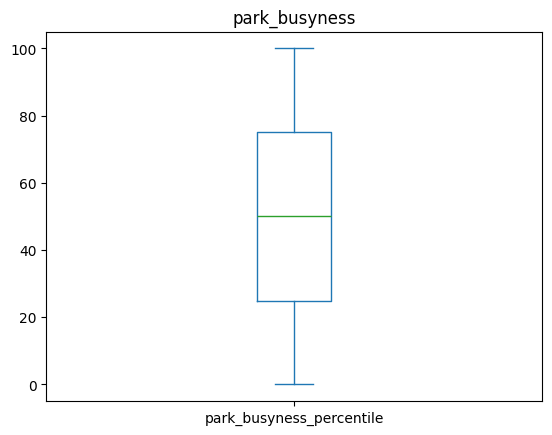

In [27]:
park_with_taxi_zone['park_busyness_percentile'].plot(kind='box', title='park_busyness')

In [31]:
parks_with_zones_id=park_with_taxi_zone[park_with_taxi_zone['park_id']=='PK45']

In [32]:
parks_with_zones_id

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,...,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry,normalized_park_busyness,park_busyness_percentile
241862,PK45,Central Park,3.413739e+06,2022,1,1,10,5,True,Winter,...,14,3.556719e+06,142980.04328,0.9598,13.437200,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",3.936212e-06,38.247440
241863,PK45,Central Park,3.413739e+06,2022,1,1,11,5,True,Winter,...,30,3.556719e+06,142980.04328,0.9598,28.794001,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",8.434739e-06,58.029522
241864,PK45,Central Park,3.413739e+06,2022,1,1,12,5,True,Winter,...,1,3.556719e+06,142980.04328,0.9598,0.959800,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",2.811580e-07,0.354674
241865,PK45,Central Park,3.413739e+06,2022,1,1,16,5,True,Winter,...,22,3.556719e+06,142980.04328,0.9598,21.115600,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",6.185475e-06,50.102419
241866,PK45,Central Park,3.413739e+06,2022,1,1,17,5,True,Winter,...,4,3.556719e+06,142980.04328,0.9598,3.839200,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",1.124632e-06,11.428062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243813,PK45,Central Park,3.413739e+06,2022,9,9,18,4,False,Autumn,...,5,3.556719e+06,142980.04328,0.9598,4.799000,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",1.405790e-06,14.682265
243814,PK45,Central Park,3.413739e+06,2022,9,9,19,4,False,Autumn,...,32,3.556719e+06,142980.04328,0.9598,30.713601,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",8.997055e-06,59.989892
243815,PK45,Central Park,3.413739e+06,2022,9,9,20,4,False,Autumn,...,1,3.556719e+06,142980.04328,0.9598,0.959800,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",2.811580e-07,0.354674
243816,PK45,Central Park,3.413739e+06,2022,9,9,8,4,False,Autumn,...,6,3.556719e+06,142980.04328,0.9598,5.758800,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",1.686948e-06,19.080166


In [47]:
parks_with_zones_id2=park_with_taxi_zone[park_with_taxi_zone['park_id']=='PK131']

In [48]:
parks_with_zones_lower_percentile=park_with_taxi_zone[park_with_taxi_zone['park_busyness_percentile']<33.33]

In [50]:
parks_with_zones_higher_percentile=park_with_taxi_zone[park_with_taxi_zone['park_busyness_percentile']>66.66]

In [51]:
parks_with_zones_higher_percentile

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,...,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry,normalized_park_busyness,park_busyness_percentile
1183,PK102,Irish Hunger Memorial,2711.372363,2022,1,1,10,5,True,Winter,...,16,4.570697e+05,4.543583e+05,0.005932,0.094913,13,Battery Park City,"POLYGON ((-74.01610 40.71514, -74.01607 40.715...",0.000035,90.977361
1184,PK102,Irish Hunger Memorial,2711.372363,2022,1,1,11,5,True,Winter,...,8,4.570697e+05,4.543583e+05,0.005932,0.047457,13,Battery Park City,"POLYGON ((-74.01610 40.71514, -74.01607 40.715...",0.000018,76.572771
1186,PK102,Irish Hunger Memorial,2711.372363,2022,1,1,16,5,True,Winter,...,19,4.570697e+05,4.543583e+05,0.005932,0.112709,13,Battery Park City,"POLYGON ((-74.01610 40.71514, -74.01607 40.715...",0.000042,93.535594
1190,PK102,Irish Hunger Memorial,2711.372363,2022,1,10,13,0,False,Winter,...,9,4.570697e+05,4.543583e+05,0.005932,0.053389,13,Battery Park City,"POLYGON ((-74.01610 40.71514, -74.01607 40.715...",0.000020,79.371516
1191,PK102,Irish Hunger Memorial,2711.372363,2022,1,10,14,0,False,Winter,...,6,4.570697e+05,4.543583e+05,0.005932,0.035592,13,Battery Park City,"POLYGON ((-74.01610 40.71514, -74.01607 40.715...",0.000013,69.541123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336360,PK99,Hudson River Park,44860.653005,2022,9,9,18,4,False,Autumn,...,18,1.947489e+06,1.812907e+06,0.256270,1.441739,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",0.000032,89.625853
336361,PK99,Hudson River Park,44860.653005,2022,9,9,19,4,False,Autumn,...,67,1.947489e+06,1.812907e+06,0.256270,4.347650,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",0.000097,99.425327
336362,PK99,Hudson River Park,44860.653005,2022,9,9,20,4,False,Autumn,...,14,1.947489e+06,1.812907e+06,0.256270,1.066909,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",0.000024,83.716201
336363,PK99,Hudson River Park,44860.653005,2022,9,9,8,4,False,Autumn,...,29,1.947489e+06,1.812907e+06,0.256270,1.904388,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",0.000042,93.912863


In [43]:
parks_with_zones_id2.head(40)

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,...,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry,normalized_park_busyness,park_busyness_percentile
241862,PK45,Central Park,3.413739e+06,2022,1,1,10,5,True,Winter,...,14,3.556719e+06,142980.04328,0.9598,13.437200,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",3.936212e-06,38.247440
241863,PK45,Central Park,3.413739e+06,2022,1,1,11,5,True,Winter,...,30,3.556719e+06,142980.04328,0.9598,28.794001,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",8.434739e-06,58.029522
241864,PK45,Central Park,3.413739e+06,2022,1,1,12,5,True,Winter,...,1,3.556719e+06,142980.04328,0.9598,0.959800,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",2.811580e-07,0.354674
241865,PK45,Central Park,3.413739e+06,2022,1,1,16,5,True,Winter,...,22,3.556719e+06,142980.04328,0.9598,21.115600,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",6.185475e-06,50.102419
241866,PK45,Central Park,3.413739e+06,2022,1,1,17,5,True,Winter,...,4,3.556719e+06,142980.04328,0.9598,3.839200,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",1.124632e-06,11.428062
241867,PK45,Central Park,3.413739e+06,2022,1,1,19,5,True,Winter,...,12,3.556719e+06,142980.04328,0.9598,11.517600,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",3.373896e-06,34.765508
241868,PK45,Central Park,3.413739e+06,2022,1,1,20,5,True,Winter,...,1,3.556719e+06,142980.04328,0.9598,0.959800,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",2.811580e-07,0.354674
241869,PK45,Central Park,3.413739e+06,2022,1,10,12,0,False,Winter,...,12,3.556719e+06,142980.04328,0.9598,11.517600,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",3.373896e-06,34.765508
241870,PK45,Central Park,3.413739e+06,2022,1,10,13,0,False,Winter,...,15,3.556719e+06,142980.04328,0.9598,14.397000,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",4.217370e-06,39.747001
241871,PK45,Central Park,3.413739e+06,2022,1,10,14,0,False,Winter,...,22,3.556719e+06,142980.04328,0.9598,21.115600,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",6.185475e-06,50.102419


In [36]:
park_with_taxi_zone.nunique()

park_id                       191
park_name                     191
park_area                     191
year                            1
month                          12
day                            31
hour                           24
day_of_week                     7
weekend                         2
season                          4
isHoliday?                      2
taxi_zone_busyness            237
taxi_zone_area                292
remaining_taxi_zone_area      473
park_proportion               484
park_busyness               21583
taxi_zone_ids                 575
taxi_zones                    575
geometry                      191
normalized_park_busyness    17534
park_busyness_percentile    17534
dtype: int64

In [15]:
park_with_taxi_zone['park_busyness'].value_counts()

park_busyness
0.000000    1192
0.002610     516
0.015626     516
0.092960     516
0.002245     516
            ... 
0.295617       1
0.245208       1
0.362563       1
0.187452       1
1.798047       1
Name: count, Length: 21583, dtype: int64

In [38]:
duplicated_rows = park_with_taxi_zone[park_with_taxi_zone.duplicated()]

#display duplicate rows
print("Duplicate Rows:")
print(duplicated_rows)

Duplicate Rows:
Empty GeoDataFrame
Columns: [park_id, park_name, park_area, year, month, day, hour, day_of_week, weekend, season, isHoliday?, taxi_zone_busyness, taxi_zone_area, remaining_taxi_zone_area, park_proportion, park_busyness, taxi_zone_ids, taxi_zones, geometry, normalized_park_busyness, park_busyness_percentile]
Index: []

[0 rows x 21 columns]


In [18]:
parks_with_zones_id.nunique()

park_id                      1
park_name                    1
park_area                    1
year                         1
month                       12
day                         31
hour                        24
day_of_week                  7
weekend                      2
season                       4
isHoliday?                   2
taxi_zone_busyness          60
taxi_zone_area               1
remaining_taxi_zone_area     1
park_proportion              1
park_busyness               60
taxi_zone_ids                1
taxi_zones                   1
geometry                     1
dtype: int64

In [64]:
parks_with_zones_percentile=park_with_taxi_zone[park_with_taxi_zone['park_busyness_percentile']> 66.66]

In [65]:
parks_with_zones_percentile

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,...,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry,normalized_park_busyness,park_busyness_percentile
1183,PK102,Irish Hunger Memorial,2711.372363,2022,1,1,10,5,True,Winter,...,16,4.570697e+05,4.543583e+05,0.005932,0.094913,13,Battery Park City,"POLYGON ((-74.01610 40.71514, -74.01607 40.715...",0.000035,90.977361
1184,PK102,Irish Hunger Memorial,2711.372363,2022,1,1,11,5,True,Winter,...,8,4.570697e+05,4.543583e+05,0.005932,0.047457,13,Battery Park City,"POLYGON ((-74.01610 40.71514, -74.01607 40.715...",0.000018,76.572771
1186,PK102,Irish Hunger Memorial,2711.372363,2022,1,1,16,5,True,Winter,...,19,4.570697e+05,4.543583e+05,0.005932,0.112709,13,Battery Park City,"POLYGON ((-74.01610 40.71514, -74.01607 40.715...",0.000042,93.535594
1190,PK102,Irish Hunger Memorial,2711.372363,2022,1,10,13,0,False,Winter,...,9,4.570697e+05,4.543583e+05,0.005932,0.053389,13,Battery Park City,"POLYGON ((-74.01610 40.71514, -74.01607 40.715...",0.000020,79.371516
1191,PK102,Irish Hunger Memorial,2711.372363,2022,1,10,14,0,False,Winter,...,6,4.570697e+05,4.543583e+05,0.005932,0.035592,13,Battery Park City,"POLYGON ((-74.01610 40.71514, -74.01607 40.715...",0.000013,69.541123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336360,PK99,Hudson River Park,44860.653005,2022,9,9,18,4,False,Autumn,...,18,1.947489e+06,1.812907e+06,0.256270,1.441739,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",0.000032,89.625853
336361,PK99,Hudson River Park,44860.653005,2022,9,9,19,4,False,Autumn,...,67,1.947489e+06,1.812907e+06,0.256270,4.347650,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",0.000097,99.425327
336362,PK99,Hudson River Park,44860.653005,2022,9,9,20,4,False,Autumn,...,14,1.947489e+06,1.812907e+06,0.256270,1.066909,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",0.000024,83.716201
336363,PK99,Hudson River Park,44860.653005,2022,9,9,8,4,False,Autumn,...,29,1.947489e+06,1.812907e+06,0.256270,1.904388,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.01578 40.72129, -74.01578 40.721...",0.000042,93.912863


In [66]:
parks_with_zones_id=park_with_taxi_zone[park_with_taxi_zone['park_id']=='PK45']

In [67]:
parks_with_zones_id

,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,...,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,taxi_zone_ids,taxi_zones,geometry,normalized_park_busyness,park_busyness_percentile
241862,PK45,Central Park,3.413739e+06,2022,1,1,10,5,True,Winter,...,14,3.556719e+06,142980.04328,0.9598,13.437200,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",3.936212e-06,38.247440
241863,PK45,Central Park,3.413739e+06,2022,1,1,11,5,True,Winter,...,30,3.556719e+06,142980.04328,0.9598,28.794001,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",8.434739e-06,58.029522
241864,PK45,Central Park,3.413739e+06,2022,1,1,12,5,True,Winter,...,1,3.556719e+06,142980.04328,0.9598,0.959800,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",2.811580e-07,0.354674
241865,PK45,Central Park,3.413739e+06,2022,1,1,16,5,True,Winter,...,22,3.556719e+06,142980.04328,0.9598,21.115600,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",6.185475e-06,50.102419
241866,PK45,Central Park,3.413739e+06,2022,1,1,17,5,True,Winter,...,4,3.556719e+06,142980.04328,0.9598,3.839200,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",1.124632e-06,11.428062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243813,PK45,Central Park,3.413739e+06,2022,9,9,18,4,False,Autumn,...,5,3.556719e+06,142980.04328,0.9598,4.799000,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",1.405790e-06,14.682265
243814,PK45,Central Park,3.413739e+06,2022,9,9,19,4,False,Autumn,...,32,3.556719e+06,142980.04328,0.9598,30.713601,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",8.997055e-06,59.989892
243815,PK45,Central Park,3.413739e+06,2022,9,9,20,4,False,Autumn,...,1,3.556719e+06,142980.04328,0.9598,0.959800,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",2.811580e-07,0.354674
243816,PK45,Central Park,3.413739e+06,2022,9,9,8,4,False,Autumn,...,6,3.556719e+06,142980.04328,0.9598,5.758800,43,Central Park,"POLYGON ((-73.95097 40.79748, -73.95026 40.797...",1.686948e-06,19.080166


In [41]:
import pandas as pd

# Assuming parks_data is your DataFrame
# Group by hour and sum the busyness
hourly_busyness = park_with_taxi_zone.groupby('hour')['park_busyness_percentile'].sum()

# Find the hour with the maximum busyness
busiest_hour = hourly_busyness.idxmax()
least_busiest_hour= hourly_busyness.idxmin()
max_busyness = hourly_busyness.max()
min_busyness = hourly_busyness.min()

print(f'The busiest hour is {busiest_hour} with a busyness of {max_busyness}.')
print(f'The least busiest hour is {least_busiest_hour} with a busyness of {min_busyness}.')



The busiest hour is 18 with a busyness of 1196615.0283174529.
The least busiest hour is 5 with a busyness of 112068.6195055966.


In [46]:
park_with_taxi_zone.dtypes

park_id                       object
park_name                     object
park_area                    float64
year                          object
month                         object
day                           object
hour                          object
day_of_week                   object
weekend                         bool
season                        object
isHoliday?                      bool
taxi_zone_busyness             int64
taxi_zone_area               float64
remaining_taxi_zone_area     float64
park_proportion              float64
park_busyness                float64
taxi_zone_ids                 object
taxi_zones                    object
geometry                    geometry
normalized_park_busyness     float64
park_busyness_percentile     float64
dtype: object

In [52]:
y= park_with_taxi_zone.describe()
y

,park_area,taxi_zone_busyness,taxi_zone_area,remaining_taxi_zone_area,park_proportion,park_busyness,normalized_park_busyness,park_busyness_percentile
count,3.363650e+05,336365.000000,3.363650e+05,3.363650e+05,336365.000000,336365.000000,336365.000000,336365.000000
mean,5.072631e+04,10.342720,1.289456e+06,1.218099e+06,0.055464,0.414960,0.000013,49.923261
std,2.769930e+05,13.572936,1.052215e+06,9.191779e+05,0.227294,2.437104,0.000018,28.931671
min,1.944321e+03,0.000000,1.011611e+05,1.270659e+04,0.000612,0.000000,0.000000,0.000297
25%,2.972994e+03,2.000000,6.598653e+05,6.404749e+05,0.003100,0.013909,0.000002,24.872683
50%,5.903096e+03,6.000000,1.011567e+06,1.009193e+06,0.007629,0.042722,0.000006,49.999257
75%,1.480185e+04,13.000000,1.546032e+06,1.539735e+06,0.018930,0.147831,0.000016,74.982237
max,3.413739e+06,339.000000,1.045151e+07,7.710310e+06,2.918735,104.634200,0.000378,100.000000


In [45]:
park_with_taxi_zone.to_file('park_busyness_normalized.geojson',driver='GeoJSON',index=False)